In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import pandas as pd

## I. DETERMINATION OF THE DIKE HEIGHT FROM HISTORICAL MEASUREMENTS

We focus on the level of water $H$ in function of the flow $Q$ of a river. 
Our goal is to build a dike to limit accidents caused by floods.  
We used an historical set of data measured from 1849 to 1997. 
HOwever the historical data we received had blank parts. Therefore, to take advantage of all the data we had, we needed to complete these parts.  
First, we searched a model for the data wich was complete.

[0.59908676 0.05477014]


<function matplotlib.pyplot.show(close=None, block=None)>

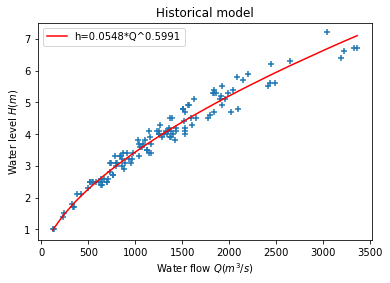

In [2]:
dh = pd.read_excel (r'Historical data completed.xlsx')
df = pd.read_excel (r'Données-projet-EDF_2018-2019 .xlsx')


Y, X= df['Hauteur associée mesurée (en m)'] ,df['Débit mesuré maximal annuel (en m3/s)']

L=[]
for i in range(len(Y)) :
  if np.isnan(Y[i]):
    L.append(i) 


X=np.delete(X.to_numpy(),L)
Y=np.delete(Y.to_numpy(),L)

X1,Y1= np.log(X), np.log(Y)

P = np.polyfit(X1,Y1,1)
P[1]=np.exp(P[1])
X2=np.sort(X)
Z= P[1] * X2**P[0]
print(P)
plt.figure()
plt.plot(X2,Z,'r',label='h={a:.4f}*Q^{b:.4f}'.format(a=P[1], b=P[0]))
plt.scatter(X,Y,marker='+')
plt.title('Historical model')
plt.xlabel(r'Water flow $Q$($m^3/s$)')
plt.ylabel(r'Water level $H$($m$)')
plt.legend()
plt.show

We were searching a law of the form :  
$$ H = a * x ^{\ b} $$
We used the logarithmic function to transform this equation in a linear one :
$$ ln(H)= ln(a) + b*ln(X) $$

Thus, we were able to use the linear regression module of numpy to obtain (after applying the exponential function) :

$$ H = 0.0548 * Q ^ {\ 0.5991} $$

With this model, we were able to complete the missing data.  

In second, we used this data to create the experimental CDF :  
We considered $H_{1}$, $H_{2}$, ...,$H_{n}$, the maxima heights of water during 1 year

$$ F_{n}(x)=\frac{\sum_{i=1}^{n}{1_{H_{i}\leq x}}}{n}$$

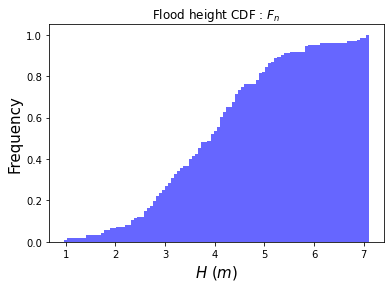

In [3]:
H=P[1] * X**P[0]

plt.figure()
plt.hist(H, bins = 100, facecolor='b', density=True, cumulative=True, alpha=0.6)
plt.title('Flood height CDF : $F_{n}$')
plt.xlabel(r'$H$ ($m$)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

Now, we have an historical model of the water level $H$ from 1849 to 1997. We need to conclude about the dam height $h_{d}$ to minimize the risk of flooding.   
To evaluate the potential risk, we need to know the average level of the bank. With the data we obtain :  
$$ bank \ level = E(Z_{b}-Z_{v}) = Z_{b} - E(Z_{v}) = 55,5 - 50 = 5,5 \ m $$
To obtain $h_{d}$, we need to work on $ H - bank \ level$
The modified graphs are :

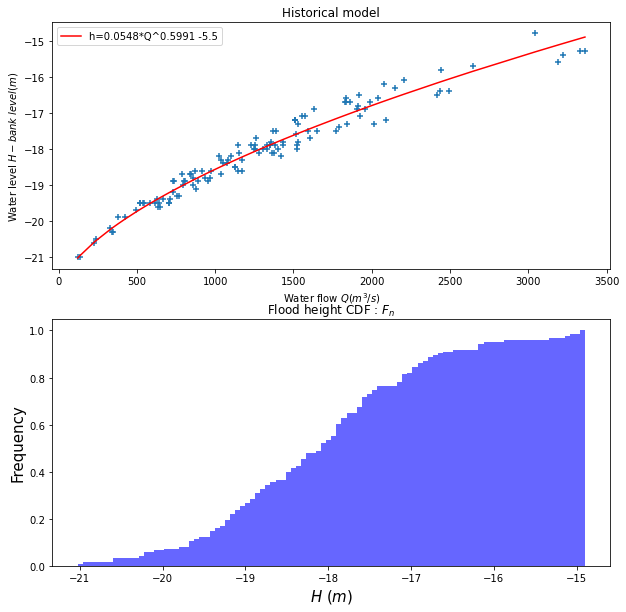

In [8]:
Z=Z-5.5
Y=Y-5.5
H= H-5.5

fig, ax = plt.subplots(2,1,figsize=(10,10),sharex=False)

ax[0].plot(X2,Z,'r',label='h={a:.4f}*Q^{b:.4f} -5.5'.format(a=P[1], b=P[0]))
ax[0].scatter(X,Y,marker='+')
ax[0].set_title('Historical model')
ax[0].set_xlabel(r'Water flow $Q$($m^3/s$)')
ax[0].set_ylabel(r'Water level $H - bank\ level$($m$)')
ax[0].legend()

ax[1].hist(H, bins = 100, facecolor='b', density=True, cumulative=True, alpha=0.6)
ax[1].set_title('Flood height CDF : $F_{n}$')
ax[1].set_xlabel(r'$H$ ($m$)',fontsize=15)
ax[1].set_ylabel('Frequency',fontsize=15)

plt.show()

To make our conclusion on this historical model, we need to choose the quantile we will work on in this study.
Usually, in this kind of system with serious consequences on surrounding activities, we choose a quantile between $\frac{1}{100}$ and $\frac{1}{1000}$.  
In this model, both quantiles have the same value however it will not be the same for future simulations :  
We choose the $\frac{1}{100}$ quantile, corresponding to a flooding every 100 years. 

In [5]:
q = np.quantile(H,0.99)
print("99th quantile =",round(q,2),"m")

99th quantile = 1.53 m


Therefore, we need to build a dam with a heigh of $h_{d} = 1.53 \ m $